## Beautiful Soup

### LaForet

In [120]:
from bs4 import BeautifulSoup
import requests as rq

urlbase = 'https://www.laforet.com/'
urlbuy = 'agence-immobiliere/meudon/acheter'
page = rq.get(urlbase+urlbuy)
soup = BeautifulSoup(page.content, "html.parser")

In [13]:
prop = soup.find_all(class_="property-card__hover")
len(prop)

11

In [102]:
link = [k.a['href'] for k in prop]
link

['/agence-immobiliere/meudon/acheter/meudon/appartement-1-piece-20960201',
 '/agence-immobiliere/meudon/acheter/meudon/appartement-1-piece-20925029',
 '/agence-immobiliere/meudon/acheter/meudon/appartement-2-pieces-20912427',
 '/agence-immobiliere/meudon/acheter/meudon/appartement-6-pieces-20894039',
 '/agence-immobiliere/meudon/acheter/issy-les-moulineaux/maison-5-pieces-19586171',
 '/agence-immobiliere/meudon/acheter/meudon/appartement-2-pieces-21011095',
 '/agence-immobiliere/meudon/acheter/meudon/maison-7-pieces-20954024',
 '/agence-immobiliere/meudon/acheter/clamart/maison-6-pieces-20908999',
 '/agence-immobiliere/meudon/acheter/meudon/appartement-4-pieces-20904343',
 '/agence-immobiliere/meudon/acheter/meudon/appartement-2-pieces-20815544',
 '/agence-immobiliere/meudon/acheter/meudon/appartement-3-pieces-18001773']

In [14]:
prop[0].a['href']

'/agence-immobiliere/meudon/acheter/meudon/appartement-1-piece-20960201'

In [90]:
prop[-1].a['href']

'/agence-immobiliere/meudon/acheter/meudon/appartement-3-pieces-18001773'

In [106]:
b = soup.find_all(class_="property-card__body")
len(b)

6

In [76]:
l = soup.find_all(class_="property-card__link")
l[0:10]

[<a class="property-card__link" data-v-2da0e5e0="" href="/agence-immobiliere/meudon/acheter/meudon/appartement-1-piece-20960201" target="_blank"></a>,
 <a class="property-card__link" data-v-2da0e5e0="" href="/agence-immobiliere/meudon/acheter/meudon/appartement-1-piece-20960201" target="_blank"></a>,
 <a class="property-card__link" data-v-2da0e5e0="" href="/agence-immobiliere/meudon/acheter/meudon/appartement-1-piece-20960201" target="_blank"></a>,
 <a class="property-card__link" data-v-2da0e5e0="" href="/agence-immobiliere/meudon/acheter/meudon/appartement-1-piece-20925029" target="_blank"></a>,
 <a class="property-card__link" data-v-2da0e5e0="" href="/agence-immobiliere/meudon/acheter/meudon/appartement-1-piece-20925029" target="_blank"></a>,
 <a class="property-card__link" data-v-2da0e5e0="" href="/agence-immobiliere/meudon/acheter/meudon/appartement-1-piece-20925029" target="_blank"></a>,
 <a class="property-card__link" data-v-2da0e5e0="" href="/agence-immobiliere/meudon/acheter/me

In [21]:
prop[0].find(class_="property-card__title").text

'\n            Appartement T1 Meudon\n          '

In [25]:
prop[0]

<div class="property-card__hover" data-v-2da0e5e0=""><a class="property-card__link" data-v-2da0e5e0="" href="/agence-immobiliere/meudon/acheter/meudon/appartement-1-piece-20960201" target="_blank"></a> <div class="property-card__overlay" data-v-2da0e5e0=""><a class="property-card__link" data-v-2da0e5e0="" href="/agence-immobiliere/meudon/acheter/meudon/appartement-1-piece-20960201" target="_blank"></a> <div class="property-card__overlay__body" data-v-2da0e5e0=""><h4 class="property-card__title" data-v-2da0e5e0="">
            Appartement T1 Meudon
          </h4> <!-- --><!-- --><!-- --></div> <!-- --></div> <!-- --></div>

In [65]:
i = soup.find_all(class_="property-card__infos")
i[0]

<div class="property-card__infos" data-v-2da0e5e0=""><div data-v-2da0e5e0=""><span class="property-card__feature" data-v-2da0e5e0="">
            53 m²
          </span><span class="property-card__feature" data-v-2da0e5e0="">
            1 chambre
          </span></div> <span class="property-card__price" data-v-2da0e5e0="">
          355 000 €
        </span></div>

In [112]:
soup.find_all(class_="property-card__hover")[0]

<div class="property-card__hover" data-v-2da0e5e0=""><a class="property-card__link" data-v-2da0e5e0="" href="/agence-immobiliere/meudon/acheter/meudon/appartement-1-piece-20960201" target="_blank"></a> <div class="property-card__overlay" data-v-2da0e5e0=""><a class="property-card__link" data-v-2da0e5e0="" href="/agence-immobiliere/meudon/acheter/meudon/appartement-1-piece-20960201" target="_blank"></a> <div class="property-card__overlay__body" data-v-2da0e5e0=""><h4 class="property-card__title" data-v-2da0e5e0="">
            Appartement T1 Meudon
          </h4> <!-- --><!-- --><!-- --></div> <!-- --></div> <!-- --></div>

In [114]:
soup.find_all(class_="property-card__overlay__body")[0]

<div class="property-card__overlay__body" data-v-2da0e5e0=""><h4 class="property-card__title" data-v-2da0e5e0="">
            Appartement T1 Meudon
          </h4> <!-- --><!-- --><!-- --></div>

In [67]:
m2 = [int(k.span.get_text(strip=True).replace(u' m²', u'')) for k in i]
m2

[53, 140, 179, 89, 47, 79]

In [59]:
f = soup.find_all(class_="property-card__feature")
int(f[0].get_text(strip=True).replace(u' m²', u''))

53

In [108]:
len(f)

12

In [70]:
f[1]

<span class="property-card__feature" data-v-2da0e5e0="">
            1 chambre
          </span>

In [84]:
t = soup.find_all(class_="property-card__title")
len(t)

11

In [87]:
t[0].get_text(strip=True)

'Appartement T1 Meudon'

In [94]:
title = [k.get_text(strip=True) for k in t]
title

['Appartement T1 Meudon',
 'Appartement T1 Meudon',
 'Appartement T2 Meudon',
 'Appartement T6 Meudon',
 'Maison T5 Issy-les-Moulineaux',
 'Appartement T2 Meudon',
 'Maison T7 Meudon',
 'Maison T6 Clamart',
 'Appartement T4 Meudon',
 'Appartement T2 Meudon',
 'Appartement T3 Meudon']

In [45]:
p = soup.find_all(class_="property-card__price")
int(p[0].get_text(strip=True).replace(u'\u202f', u'').replace(u'\xa0€', u''))

355000

In [93]:
price = [int(k.get_text(strip=True).replace(u'\u202f', u'').replace(u'\xa0€', u'')) for k in p]
price

[355000, 1070000, 967000, 630000, 315000, 510000]

In [124]:
ph = soup.find_all(class_="property-card__photo")
photo = [k['src'] for k in ph]
photo[0]

'data:image/svg+xml;charset=UTF-8,%3Csvg%20width%3D%221%22%20height%3D%221%22%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20viewBox%3D%220%200%20%25%7Bw%7D%20%25%7Bh%7D%22%20preserveAspectRatio%3D%22none%22%3E%3Crect%20width%3D%22100%25%22%20height%3D%22100%25%22%20style%3D%22fill%3Atransparent%3B%22%3E%3C%2Frect%3E%3C%2Fsvg%3E'

In [103]:
import pandas as pd
pd.DataFrame(zip(title,link),columns=["title","link"])

,title,link
0,Appartement T1 Meudon,/agence-immobiliere/meudon/acheter/meudon/appa...
1,Appartement T1 Meudon,/agence-immobiliere/meudon/acheter/meudon/appa...
2,Appartement T2 Meudon,/agence-immobiliere/meudon/acheter/meudon/appa...
3,Appartement T6 Meudon,/agence-immobiliere/meudon/acheter/meudon/appa...
4,Maison T5 Issy-les-Moulineaux,/agence-immobiliere/meudon/acheter/issy-les-mo...
5,Appartement T2 Meudon,/agence-immobiliere/meudon/acheter/meudon/appa...
6,Maison T7 Meudon,/agence-immobiliere/meudon/acheter/meudon/mais...
7,Maison T6 Clamart,/agence-immobiliere/meudon/acheter/clamart/mai...
8,Appartement T4 Meudon,/agence-immobiliere/meudon/acheter/meudon/appa...
9,Appartement T2 Meudon,/agence-immobiliere/meudon/acheter/meudon/appa...


### Century 21

In [125]:
from bs4 import BeautifulSoup
import requests as rq

urlbase = 'https://www.century21-adc-meudon.com/'
urlbuy = 'annonces/achat/'
page = rq.get(urlbase+urlbuy)
soup = BeautifulSoup(page.content, "html.parser")

In [127]:
prop = soup.find_all(class_="c-the-property-thumbnail-with-content")
len(prop)

9

In [162]:
prop[0].img

<img alt="Appartement F4 à vendre MEUDON" class="tw-absolute tw-inset-0 tw-z-1 tw-w-full tw-h-full tw-object-cover" height="480" src="/imagesBien/s3/202/3350/c21_202_3350_1421_8_91299B25-305F-4662-A6B1-3C16E4901E6A.jpg" width="640"/>

In [131]:
prop[0].a

<a href="/trouver_logement/detail/2732726839/ ">
<img alt="Appartement F4 à vendre MEUDON" class="tw-absolute tw-inset-0 tw-z-1 tw-w-full tw-h-full tw-object-cover" height="480" src="/imagesBien/s3/202/3350/c21_202_3350_1421_8_91299B25-305F-4662-A6B1-3C16E4901E6A.jpg" width="640"/>
</a>

In [163]:
link = [k.a['href'] for k in prop]
link

['/trouver_logement/detail/2732726839/ ',
 '/trouver_logement/detail/2732092856/ ',
 '/trouver_logement/detail/2450366078/ ',
 '/trouver_logement/detail/2406896091/ ',
 '/trouver_logement/detail/2523814827/ ',
 '/trouver_logement/detail/2364219665/ ',
 '/trouver_logement/detail/2330246084/ ',
 '/trouver_logement/detail/2594769511/ ',
 '/trouver_logement/detail/2594720879/ ']

In [138]:
soup.find_all(class_="c-text-theme-heading-4 tw-tracking-c21-theme-0 tw-text-c21-grey-darker tw-font-barlow tw-font-bold")[0].get_text(strip=True)

'MEUDON\xa0\n          \n          92103,87 m2, 4 piècesRef : 1421'

In [150]:
h = soup.find_all(class_="c-text-theme-heading-3 tw-tracking-c21-theme-0 tw-leading-none tw-text-c21-grey-darker")

In [152]:
# h[0].get_text(strip=True)
title = [k.get_text(strip=True) for k in h]
title

['Appartement F4 à vendre',
 'Appartement T3 à vendre',
 'Maison à vendre',
 'Appartement F4 à vendre',
 'Maison à vendre',
 'Appartement T4 à vendre',
 'Maison à vendre',
 'Maison à vendre',
 'Maison à vendre']

In [146]:
p = soup.find_all(class_="c-text-theme-heading-1 is-constant tw-tracking-c21-theme-40 tw-mt-2 tablet-landscape:tw-mt-0")

In [149]:
price = [int(k.get_text(strip=True).replace(' ', '').replace(u'\xa0€', u'')) for k in p]
price

[630000, 388500, 1295000, 525200, 995000, 705375, 1850000, 535000, 1050000]

In [165]:
import pandas as pd
pd.DataFrame(zip(title,price,link),columns=["title","price","link"])

,title,price,link
0,Appartement T1 Meudon,630000,/trouver_logement/detail/2732726839/
1,Appartement T1 Meudon,388500,/trouver_logement/detail/2732092856/
2,Appartement T2 Meudon,1295000,/trouver_logement/detail/2450366078/
3,Appartement T6 Meudon,525200,/trouver_logement/detail/2406896091/
4,Maison T5 Issy-les-Moulineaux,995000,/trouver_logement/detail/2523814827/
5,Appartement T2 Meudon,705375,/trouver_logement/detail/2364219665/
6,Maison T7 Meudon,1850000,/trouver_logement/detail/2330246084/
7,Maison T6 Clamart,535000,/trouver_logement/detail/2594769511/
8,Appartement T4 Meudon,1050000,/trouver_logement/detail/2594720879/


### Orpi

In [166]:
from bs4 import BeautifulSoup
import requests as rq

urlbase = 'https://www.orpi.com/'
urlbuy = 'agenceorangerie/acheter'
page = rq.get(urlbase+urlbuy)
soup = BeautifulSoup(page.content, "html.parser")

In [190]:
h = soup.find_all(class_="u-link-unstyled c-overlay__link")
# h[0].get_text(strip=True)
title = [k.get_text(strip=True) for k in h]
title

['Maison10pièces220m2',
 'Appartement4pièces83,03m2',
 'Appartement2pièces32,27m2',
 'Maison3pièces60m2',
 'Appartement3pièces62,45m2',
 'Maison6pièces200m2',
 'Appartement3pièces52,72m2',
 'Appartement4pièces76,35m2',
 'Maison5pièces95m2',
 'Appartement2pièces46,86m2',
 'Appartement3pièces62,75m2',
 'Maison5pièces90m2',
 'Appartement3pièces63,21m2',
 'Appartement4pièces81,52m2']

In [169]:
l = soup.find_all(class_="u-link-unstyled c-overlay__link")
link = [k['href'] for k in l]
link

['/annonce-vente-maison-t10-meudon-92190-b-e21cl2/?agency=agenceorangerie',
 '/annonce-vente-appartement-t4-sevres-92310-b-e22tbn/?agency=agenceorangerie',
 '/annonce-vente-appartement-t2-chaville-92370-b-e24tw9/?agency=agenceorangerie',
 '/annonce-vente-maison-t3-chaville-92370-b-e24vy5/?agency=agenceorangerie',
 '/annonce-vente-appartement-t3-sevres-92310-b-e24k2l/?agency=agenceorangerie',
 '/annonce-vente-maison-t6-velizy-villacoublay-92370-b-e249hn/?agency=agenceorangerie',
 '/annonce-vente-appartement-t3-meudon-92190-b-e24fcf/?agency=agenceorangerie',
 '/annonce-vente-appartement-t4-sevres-92310-b-e1xmst/?agency=agenceorangerie',
 '/annonce-vente-maison-t5-chaville-92370-b-e16n2t/?agency=agenceorangerie',
 '/annonce-vente-appartement-t2-meudon-92190-b-012hco/?agency=agenceorangerie',
 '/annonce-vente-appartement-t3-sevres-92310-b-e20dfb/?agency=agenceorangerie',
 '/annonce-vente-maison-t5-chaville-92370-b-e1ymhm/?agency=agenceorangerie',
 '/annonce-vente-appartement-t3-meudon-9219

In [173]:
i = soup.find_all(class_="c-overlay__zoom")
img = [k['data-src'] for k in i]
img

['https://static.orpi.com/images/immo-facile/estate-result-item/office6/orpi_72969/catalog/images/pr_p/9/3/4/5/4/6/9/9345469a--202112141853.jpg',
 'https://static.orpi.com/images/immo-facile/estate-result-item/office6/orpi_149713/catalog/images/pr_p/9/4/2/9/2/1/8/9429218a--202112101618.jpg',
 'https://static.orpi.com/images/immo-facile/estate-result-item/office6/orpi_72969/catalog/images/pr_p/9/5/4/4/4/3/3/9544433a--202111091003.jpg',
 'https://static.orpi.com/images/immo-facile/estate-result-item/office6/orpi_72969/catalog/images/pr_p/9/5/4/7/6/0/8/9547608a--202111151010.jpg',
 'https://static.orpi.com/images/immo-facile/estate-result-item/office6/orpi_149713/catalog/images/pr_p/9/5/2/9/6/7/2/9529672a--202111021608.jpg',
 'https://static.orpi.com/images/immo-facile/estate-result-item/office6/orpi_72969/catalog/images/pr_p/9/5/1/3/2/9/6/9513296a--202110301706.jpg',
 'https://static.orpi.com/images/immo-facile/estate-result-item/office6/orpi_72969/catalog/images/pr_p/9/5/2/2/1/3/8/95221

In [183]:
p = soup.find_all(class_="u-text-md u-color-primary")
price = [int(k.get_text(strip=True).replace(u'\xa0', u'').replace(u'€', u'')) for k in p]
price

[1295000,
 470250,
 210000,
 499000,
 405000,
 1090000,
 350000,
 430000,
 695000,
 315000,
 390000,
 645000,
 420000,
 520000]

In [191]:
import pandas as pd
pd.DataFrame(zip(title,price,link),columns=["title","price","link"])

,title,price,link
0,Maison10pièces220m2,1295000,/annonce-vente-maison-t10-meudon-92190-b-e21cl...
1,"Appartement4pièces83,03m2",470250,/annonce-vente-appartement-t4-sevres-92310-b-e...
2,"Appartement2pièces32,27m2",210000,/annonce-vente-appartement-t2-chaville-92370-b...
3,Maison3pièces60m2,499000,/annonce-vente-maison-t3-chaville-92370-b-e24v...
4,"Appartement3pièces62,45m2",405000,/annonce-vente-appartement-t3-sevres-92310-b-e...
5,Maison6pièces200m2,1090000,/annonce-vente-maison-t6-velizy-villacoublay-9...
6,"Appartement3pièces52,72m2",350000,/annonce-vente-appartement-t3-meudon-92190-b-e...
7,"Appartement4pièces76,35m2",430000,/annonce-vente-appartement-t4-sevres-92310-b-e...
8,Maison5pièces95m2,695000,/annonce-vente-maison-t5-chaville-92370-b-e16n...
9,"Appartement2pièces46,86m2",315000,/annonce-vente-appartement-t2-meudon-92190-b-0...


## Selenium

https://realpython.com/modern-web-automation-with-python-and-selenium/


Download Chrome driver (version 95 here):

https://sites.google.com/chromium.org/driver/

In [1]:
import pandas as pd
import os

os.listdir()

['2022 immo search - Meudon - Sheet1.csv',
 'chromedriver.exe',
 'env',
 'requirements.txt',
 'scraper.ipynb']

In [4]:
df = pd.read_csv("2022 immo search - Meudon - Sheet1.csv")
df['URL'][0]

'https://www.seloger.com/annonces/achat/appartement/meudon-92/bas-meudon/179545595.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail'

In [5]:
from selenium import webdriver
browser = webdriver.Chrome('chromedriver.exe')


C:\Users\ydebray\AppData\Local\Temp/ipykernel_2328/60826164.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('chromedriver.exe')


In [6]:
browser.get(df['URL'][0])

# browser.quit()

enter login / password

## Elements of the page

In [10]:
# Price
el = browser.find_element_by_xpath('//*[@id="__next"]/div/main/div[3]/div/div[1]/div[1]/div[3]/div/div[2]/div[1]/div/span/span')
el.text

C:\Users\ydebray\AppData\Local\Temp/ipykernel_2328/2627604637.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  el = browser.find_element_by_xpath('//*[@id="__next"]/div/main/div[3]/div/div[1]/div[1]/div[3]/div/div[2]/div[1]/div/span/span')


'422 000 €'

In [11]:
# Size
xpath = '//*[@id="__next"]/div/main/div[3]/div/div[1]/div[1]/div[3]/div/div[1]/div[2]/div[3]'
el = browser.find_element_by_xpath(xpath)
el.text

C:\Users\ydebray\AppData\Local\Temp/ipykernel_2328/2578299079.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  el = browser.find_element_by_xpath(xpath)


'65 m²'

In [14]:
# Photo
xpath = '//*[@id="__next"]/div/main/div[3]/div/div[1]/div[1]/div[2]/div/div[1]/div[2]/div[2]/div/div[2]/img'
el = browser.find_element_by_xpath(xpath)
src = el.get_attribute('src')
src

C:\Users\ydebray\AppData\Local\Temp/ipykernel_2328/2330710195.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  el = browser.find_element_by_xpath(xpath)


'https://v.seloger.com/s/cdn/x/visuels/0/i/s/0/0is05hby2aevm4xd9rnxpk2zie9y3prod76g0exk8.jpg'

In [ ]:
# from PIL import Image
# im = Image.open(src)
# im.show()

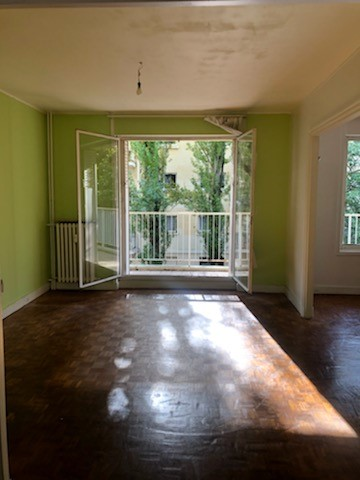

In [18]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(src)
img = Image.open(BytesIO(response.content))
img

## Loop on pages

In [19]:
links = list(df['URL'])
links

['https://www.seloger.com/annonces/achat/appartement/meudon-92/bas-meudon/179545595.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/bellevue/177480361.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/179698397.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/bellevue/179701659.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annon

In [21]:
from urllib.parse import urlparse
urlparse(links[0]).hostname

'www.seloger.com'

In [22]:
links = [link if urlparse(link).hostname == "www.seloger.com" else "" for link in links]
links

['https://www.seloger.com/annonces/achat/appartement/meudon-92/bas-meudon/179545595.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/bellevue/177480361.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/179698397.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/bellevue/179701659.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annon

In [27]:
links.remove('')
links

['https://www.seloger.com/annonces/achat/appartement/meudon-92/bas-meudon/179545595.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/bellevue/177480361.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/179698397.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annonces/achat/appartement/meudon-92/bellevue/179701659.htm?projects=2&types=2,1&places=[{%22inseeCodes%22:[920048]}]&price=NaN/500000&surface=60/NaN&mandatorycommodities=0&enterprise=0&qsVersion=1.0&m=map_to_detail',
 'https://www.seloger.com/annon

Alternative: `mylist.find('seloger')` or `import re; r = re.compile("pattern"); newlist = list(filter(r.match, mylist))`

In [28]:
import time
prices = []
sizes = []
photos = []

for link in links:
    browser.get(link)
    time.sleep(2)
    try:
        # Price
        p = browser.find_element_by_xpath('//*[@id="__next"]/div/main/div[3]/div/div[1]/div[1]/div[3]/div/div[2]/div[1]/div/span/span')
        prices.append(p.text)
        xpath = '//*[@id="__next"]/div/main/div[3]/div/div[1]/div[1]/div[3]/div/div[1]/div[2]/div[3]'
        s = browser.find_element_by_xpath(xpath)
        sizes.append(s.text)
        xpath = '//*[@id="__next"]/div/main/div[3]/div/div[1]/div[1]/div[2]/div/div[1]/div[2]/div[2]/div/div[2]/img'
        el = browser.find_element_by_xpath(xpath)
        src = el.get_attribute('src')
        photos.append(src)
    except:
        pass

C:\Users\ydebray\AppData\Local\Temp/ipykernel_2328/2651383276.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  p = browser.find_element_by_xpath('//*[@id="__next"]/div/main/div[3]/div/div[1]/div[1]/div[3]/div/div[2]/div[1]/div/span/span')
C:\Users\ydebray\AppData\Local\Temp/ipykernel_2328/2651383276.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  s = browser.find_element_by_xpath(xpath)
C:\Users\ydebray\AppData\Local\Temp/ipykernel_2328/2651383276.py:17: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  el = browser.find_element_by_xpath(xpath)


In [30]:
prices,sizes,photos

(['422 000 €', '332 170 €', '388 500 €', '483 000 €'],
 ['65 m²', '69 m²', '60,15 m²', '82 m²'],
 ['https://v.seloger.com/s/cdn/x/visuels/0/i/s/0/0is05hby2aevm4xd9rnxpk2zie9y3prod76g0exk8.jpg',
  'https://v.seloger.com/s/width/800/visuels/0/v/b/s/0vbssva4fqv4qb5vfb2z9nlo0efkibzgjzipbwlka.jpg',
  'https://v.seloger.com/s/width/800/visuels/0/g/n/0/0gn0vk9hd7e8ditveohleail9szxdudk9ut6ywzhc.jpg',
  'https://v.seloger.com/s/width/800/visuels/0/r/z/2/0rz2ipk5zyijacpyqdv0h805zgdk3dipxn2idwwzk.jpg'])